<a href="https://colab.research.google.com/github/cyankaet/orderml/blob/master/orderparams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/orderml

/content/drive/.shortcut-targets-by-id/1FKl2J9VPA88stIpA_grTLED-Fv9_B7CF/orderml


Any other drive folder is, hint, probably not the correct one! Navigate to where your orderml folder is in your drive. This code should work for a top-level folder.

Check you're in the right folder.



In [ ]:
ls

logs/  orderparams.ipynb  problems.txt  __pycache__/  test.png


Install non-default packages here.

In [ ]:
!pip install bumps
!pip install gym
%tensorflow_version 1.x
!pip install stable-baselines[mpi]==2.10.0

     |████████████████████████████████| 522kB 3.4MB/s 
  Created wheel for bumps: filename=bumps-0.7.16-cp36-none-any.whl size=546174 sha256=8d94f7273715a1435ca6734228bec7a1d0aaec1dad95cc281b0aefaefc85b574
  Stored in directory: /root/.cache/pip/wheels/41/f7/17/a898c85754ad1c6d7de087e28809af7989b81f14f200547de3
Successfully built bumps
TensorFlow 1.x selected.
     |████████████████████████████████| 256kB 3.5MB/s 
  Found existing installation: stable-baselines 2.2.1
    Uninstalling stable-baselines-2.2.1:
      Successfully uninstalled stable-baselines-2.2.1


"Compile" code.

In [ ]:
class OrderMethods():

    def getData(T, x, p):
        Jt, Nf, Bk = p
        return OrderMethods.orderparameter(T, x, Jt, Nf, Bk)

    def bsol(temp,p):
        Tn,Jt,Nf,Bk=p
        t=4.0*(Jt/(Jt+1.0))*Tn/temp
        #print t
        if (Tn<=0) or (Jt<=0) or temp>=Tn:
            xout=0.0
        else:
            xout=optimize.brentq(OrderMethods.bfun,0.0,t,args=(temp,p),xtol=1e-6)

        return xout


    def bfun(x,T,p):
        Tn,Jt,Nf,Bk=p
        if x==0.0:
            B=-1.0 # so that it wont find solution at zero
        else:
            B=(x-3*OrderMethods.brill(Jt,x)*(Jt/(Jt+1))*(Tn/T))
        return B

    def brill(j,x):
        temp=(2*j+1.0)/2/j
        if x==0:
            Br=0.0
        else:
            Br=temp/np.tanh(temp*x)-1.0/np.tanh(x/2/j)/2/j
        return Br

    def Intensity(T,p):
        Tn,Jt,Nf,Bk=p
        br=OrderMethods.brill(Jt,OrderMethods.bsol(T,p))
        bout=Bk+Nf*br**2
        return bout

    def orderparameter(T, Tn, Jt, Nf, Bk):
        p=[Tn, Jt, Nf, Bk]
        I=[]
        for t in T:
            I.append(OrderMethods.Intensity(t,p))
        return np.array(I)

    def fit(model):
        problem = FitProblem(model)
        result = fitters.fit(problem, method='lm')
        for p, v in zip(problem._parameters, result.dx):
            p.dx = v
        return result.x, result.dx, problem.chisq(), problem._parameters
        

In [ ]:
from gym.spaces import Space

class ListBox(Space):
    def __init__(self, length, low, high):
        #what we did for bindiscrete is below
        # self.n = n
        # self.arr = (n,)
        # super(Bin_Discrete, self).__init__(self.arr, np.int64)

    def sample(self):


    def update(actions): # self? not in binDiscrete


    def contains(self, x):

    
    def __repr__(self):

    
    def __eq__(self):


    def to_jsonable(self, sample_n):
        """Convert a batch of samples from this space to a JSONable data type."""
        # By default, assume identity is JSONable
        return sample_n

    def from_jsonable(self, sample_n):
        """Convert a JSONable data type to a batch of samples from this space."""
        # By default, assume identity is JSONable
        return sample_n


IndentationError: ignored

Execute main class.

In [ ]:
import sys
import numpy as np
import pylab as plt
import scipy.optimize as optimize
from bumps.names import *
import bumps.fitters as fitters
import gym.spaces as spaces
import gym

class OrderEnv(gym.Env): #add gym.env

    def __init__(self):
        self.reward_scale = 100
        self.episodeNum = 0
        self.steps = 0
        self.T = np.array([])
        self.startTn = 160
        self.p = [.885,330,.3]
        self.error = []
        # self.M = Curve(orderparameter, T, I, error, Jt = self.p[0], Nf = self.p[1], Bk = self.p[2])
        # self.M.Tn.range(self.startTn - 20 , self.startTn + 20)

        # self.observation_space = spaces.Box(low = np.array([3]), high = np.array([340]))
        # self.action_space = spaces.Box(0, 337)
        self.curTemp = 3
        self.x = self.startTn

        #logging arrays and vars
        self.rewards = [] #interepisodic
        self.chisqds = []
        self.transTemps = []
        self.totReward = 0 
        self.info = {}     

    def step(self, action): 

        print("stepping")
        print("delta T: ", action)

        self.curTemp += action
        print("curtemp: ", self.curTemp)
        self.curTemp = self.round_to(self.curTemp, 0.5)

        self.steps += 1
        reward = -self.reward_scale
        self.T = np.append(self.T, self.curTemp)
        print("Temperature: ", self.T)
        
        if self.steps > 1:
            self.I = OrderMethods.getData(self.T, self.x, self.p)
            print("Intensity: ", self.I)
            self.error= np.sqrt(self.I)
            M = Curve(OrderMethods.orderparameter, self.T, self.I, self.error, Jt = self.p[0], Nf = self.p[1], Bk = self.p[2])
            M.Tn.range(self.x - 20 , self.x + 20)

            self.x, dx, chisq, params = OrderMethods.fit(M)
            self.x = self.x[0]

            dx = params[0].dx

            reward = 0

            if chisq < 10:
                reward += 1000

                if dx < 2e-3:
                    reward+=1/dx

            self.chisqds.append(chisq)
            self.transTemps.append(self.x)

        self.totReward += reward
        np.append(self.state, self.curTemp)
        delta = abs(340 - self.curTemp)

        if ((self.steps > 20 and chisq < 0.05) or delta <= 0.5): #less than or equal to?
            terminal = True
            self.log()
        elif (self.steps > 100):
            terminal = True
            self.log()
        else:
            terminal = False

        return self.state, reward, terminal, self.info


    def reset(self):
        print("reset")
        self.steps = 0
        self.T = np.array([])
        self.I = []
        self.chisqds = []
        self.transTemps = []
        self.totReward = 0
        self.curTemp = 3
        self.state = np.array([self.curTemp])

        return self.state #starting state

    def log(self):
        self.episodeNum += 1

        filename = "logs/chis/chiLog-" + str(self.episodeNum) + ".txt"
        np.savetxt(filename, self.chisqds)

        filename = "logs/temps/tnLog-" + str(self.episodeNum) + ".txt"
        np.savetxt(filename, self.transTemps)

        self.rewards.append(self.totReward)
        filename = "logs/runrewards.txt"
        np.savetxt(filename, self.rewards)

    @property
    def action_space(self):
        return spaces.Box(low = np.array([0]), high = np.array([340 - self.curTemp]))

    @property 
    def observation_space(self):
        return spaces.Box(low=3.0, high=340.0, shape=(self.steps + 1,), dtype=np.float32)


    def round_to(self, n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision


In [ ]:
from stable_baselines.common.env_checker import check_env
env = OrderEnv()
# If the environment don't follow the interface, an error will be thrown
check_env(env, warn=True)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.6/dist-packages/stable_baselines/common/env_checker.py:210: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf https://stable-baselines.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn("We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "


reset
stepping
delta T:  [317.36102]
curtemp:  [320.36102]
Temperature:  [320.5]
stepping
delta T:  [16.653238]
curtemp:  [337.15323]
Temperature:  [320.5 337. ]
Intensity:  [0.3 0.3]
stepping
delta T:  [0.96913934]
curtemp:  [337.96915]
Temperature:  [320.5 337.  338. ]
Intensity:  [0.3 0.3 0.3]
stepping
delta T:  [1.3335431]
curtemp:  [339.33356]
Temperature:  [320.5 337.  338.  339.5]
Intensity:  [0.3 0.3 0.3 0.3]


In [ ]:
from stable_baselines import DQN, PPO2, A2C, ACKTR
from stable_baselines.common.cmd_util import make_vec_env

# Instantiate the env
env = OrderEnv()
# wrap it
env = make_vec_env(lambda: env, n_envs=1) #retrieve?

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
# Train the agent
model = A2C('MlpPolicy', env, verbose=1).learn(5000)

Streaming output truncated to the last 5000 lines.
stepping
curtemp:  [7.5]
Temperature:  [3.  3.5 3.5 3.5 4.5 4.5 5.  5.  5.  5.  6.  6.  6.5 6.5 6.5 6.5 7.5 7.5
 7.5 7.5 7.5]
Intensity:  [330.29999938 330.29998775 330.29998775 330.29998775 330.29934241
 330.29934241 330.29734885 330.29734885 330.29734885 330.29734885
 330.27853342 330.27853342 330.25200084 330.25200084 330.25200084
 330.25200084 330.12589552 330.12589552 330.12589552 330.12589552
 330.12589552]
reset
stepping
curtemp:  [3.615354]
Temperature:  [3.5]
stepping
curtemp:  [3.6410189]
Temperature:  [3.5 3.5]
Intensity:  [330.29998775 330.29998775]
stepping
curtemp:  [3.6124034]
Temperature:  [3.5 3.5 3.5]
Intensity:  [330.29998775 330.29998775 330.29998775]
stepping
curtemp:  [5.051933]
Temperature:  [3.5 3.5 3.5 5. ]
Intensity:  [330.29998775 330.29998775 330.29998775 330.29734885]
stepping
curtemp:  [5.781787]
Temperature:  [3.5 3.5 3.5 5.  6. ]
Intensity:  [330.29998775 330.29998775 330.29998775 330.29734885 330.278533

KeyboardInterrupt: ignored

In [ ]:
# Test the trained agent
obs = env.reset()
n_steps = 20
for step in range(n_steps):
  action, _ = model.predict(obs, deterministic=True)
  print("Step {}".format(step + 1))
  print("Action: ", action)
  obs, reward, done, info = env.step(action)
  print('obs=', obs, 'reward=', reward, 'done=', done)
  env.render(mode='console')
  if done:
    # Note that the VecEnv resets automatically
    # when a done signal is encountered
    print("Goal reached!", "reward=", reward)
    break

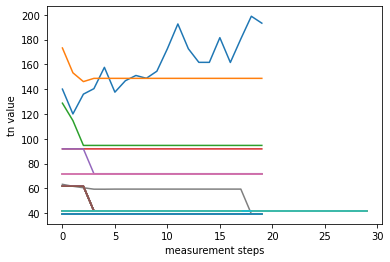

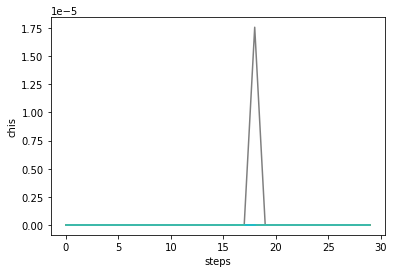

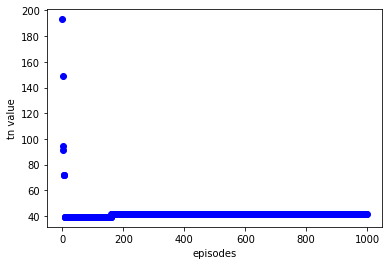

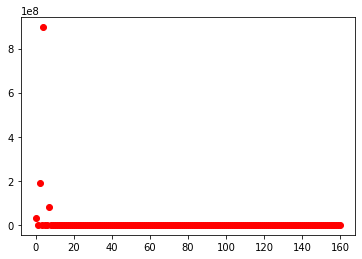

In [ ]:
numTrials = 1000

endParams = [[] for i in range(numTrials)]
data = [[] for i in range(numTrials)]
chis = [[] for i in range(numTrials)]
endtns = []
imagestore = "logs/"
logstore = "logs/"

for i in range(1,numTrials+1):
    data[i-1] = np.loadtxt(logstore +  "temps/tnLog-" + str(i) + ".txt")
    #print(data[i-1])
    chis[i-1] = np.loadtxt(logstore + "chis/chiLog-" + str(i) + ".txt")

for i in range (0, len(data)): 
    plt.plot(data[i], label = str(i))
    endtns.append(data[i][-1])

plt.xlabel("measurement steps")
plt.ylabel("tn value")
plt.show()
plt.savefig(imagestore + "tns.png")
plt.close()

for i in range (0, len(chis)):
  plt.plot(chis[i], label = str(i))

plt.xlabel("steps")
plt.ylabel("chis")
plt.show()
plt.close()

plt.plot(endtns, 'bo')
plt.xlabel("episodes")
plt.ylabel("tn value")
plt.show()
plt.savefig(imagestore + "endtns.png")
plt.close()

rewards = np.loadtxt('logs/runrewards.txt')
plt.plot(rewards, 'ro')
plt.show()
plt.close()


temperature:  [ 50  54  58  62  66  70  74  78  82  86  90  94  98 102 106 110 114 118
 122 126 130 134 138 142 146 150 154 158 162 166 170 174 178 182 186 190
 194 198 202 206 210 214 218 222 226 230 234 238 242 246 250 254 258 262
 266 270 274 278 282 286 290 294 298]
Intensity:  [3.25537076e+02 3.23251478e+02 3.20375706e+02 3.16873453e+02
 3.12716244e+02 3.07881645e+02 3.02351805e+02 2.96112302e+02
 2.89151276e+02 2.81458783e+02 2.73026346e+02 2.63846598e+02
 2.53913041e+02 2.43219822e+02 2.31761787e+02 2.19534119e+02
 2.06532446e+02 1.92752737e+02 1.78191311e+02 1.62844696e+02
 1.46709717e+02 1.29783383e+02 1.12062994e+02 9.35459609e+01
 7.42298117e+01 5.41124126e+01 3.31916388e+01 1.14655906e+01
 3.00000000e-01 3.00000000e-01 3.00000000e-01 3.00000000e-01
 3.00000000e-01 3.00000000e-01 3.00000000e-01 3.00000000e-01
 3.00000000e-01 3.00000000e-01 3.00000000e-01 3.00000000e-01
 3.00000000e-01 3.00000000e-01 3.00000000e-01 3.00000000e-01
 3.00000000e-01 3.00000000e-01 3.00000000e-01 

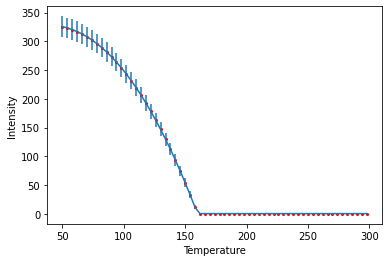

In [ ]:
p=[.885,330,.3]
T=np.arange(50, 300, 4)
print("temperature: ", T)
#T=N.arange(10,300,2)
I=[]
error = []

I=OrderMethods.orderparameter(T, 160,p[0],p[1],p[2])
print("Intensity: ", I)
error= np.sqrt(I)
#print(error)

M = Curve(OrderMethods.orderparameter, T, I, error, Jt = p[0], Nf = p[1], Bk = p[2])
M.Tn.range(10,400)

x, dx, chisq, params = OrderMethods.fit(M)
print(x)

fitI = OrderMethods.orderparameter(T, x, p[0],p[1],p[2])

plt.errorbar(T, I, error)
plt.plot(T, fitI,'ro', markersize = 2)
plt.xlabel("Temperature")
plt.ylabel("Intensity") 
plt.show()
plt.savefig("test")
plt.close()